## Setup and Data Loading

In [63]:
# Import utilities and libraries
import sys
import os
import importlib

# Add analysis directory to Python path (notebook runs from project root)
analysis_dir = os.path.join(os.getcwd(), 'analysis')
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

# Import and reload utils to get latest changes
import utils
importlib.reload(utils)
from utils import *

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
setup_plotting_style()

print("Libraries and utilities imported and reloaded successfully!")

Libraries and utilities imported and reloaded successfully!


## Configuration

Configure the analysis parameters and algorithm folder to analyze.

In [64]:
# Configuration: Set the algorithm folder name here
# Change this to analyze different algorithm results (e.g., "greedy", "genetic", "simulated_annealing", etc.)
ALGORITHM_FOLDER = "local_search"

# Instances to analyze (can be modified as needed)
INSTANCES = ['TSPA', 'TSPB']

# Export settings
EXPORT_ENABLED = False
EXPORT_PLOTS = False
PLOT_FORMAT = 'png'  # Options: 'png', 'pdf', 'svg'
PLOT_DPI = 300

print(f"Configuration set:")
print(f"  Algorithm folder: {ALGORITHM_FOLDER}")
print(f"  Instances: {INSTANCES}")
print(f"  Export enabled: {EXPORT_ENABLED}")
print(f"  Plot format: {PLOT_FORMAT} (DPI: {PLOT_DPI})")

Configuration set:
  Algorithm folder: local_search
  Instances: ['TSPA', 'TSPB']
  Export enabled: False
  Plot format: png (DPI: 300)


In [65]:
# Load algorithm data using utility functions
algorithm_data = load_all_algorithm_results(ALGORITHM_FOLDER, INSTANCES)

if algorithm_data:
    print(f"\nSuccessfully loaded data for {len(algorithm_data)} instances")
    for instance_name, data in algorithm_data.items():
        df = data['df']
        print(f"{instance_name}: {len(df)} results")
else:
    print("No data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")
    print(f"Available algorithm folders: {get_available_algorithm_folders()}")
    for folder in get_available_algorithm_folders():
        instances = get_available_instances(folder)
        print(f"  {folder}: {instances}")

Loaded 1600 results for TSPA from local_search folder
Algorithms: ['GreedyLS_Edges_NearestNeighborAny2Regret_w1_1', 'GreedyLS_Edges_Random', 'GreedyLS_Nodes_NearestNeighborAny2Regret_w1_1', 'GreedyLS_Nodes_Random', 'SteepestLS_Edges_NearestNeighborAny2Regret_w1_1', 'SteepestLS_Edges_Random', 'SteepestLS_Nodes_NearestNeighborAny2Regret_w1_1', 'SteepestLS_Nodes_Random']
Loaded 1600 results for TSPB from local_search folder
Algorithms: ['GreedyLS_Edges_NearestNeighborAny2Regret_w1_1', 'GreedyLS_Edges_Random', 'GreedyLS_Nodes_NearestNeighborAny2Regret_w1_1', 'GreedyLS_Nodes_Random', 'SteepestLS_Edges_NearestNeighborAny2Regret_w1_1', 'SteepestLS_Edges_Random', 'SteepestLS_Nodes_NearestNeighborAny2Regret_w1_1', 'SteepestLS_Nodes_Random']

Successfully loaded data for 2 instances
TSPA: 1600 results
TSPB: 1600 results


## Visualization Data Exporter

This section provides functionality to export visualization data and results to files for use in other analysis tools.

In [66]:
# Create exporter instance using the utility class
exporter = VisualizationExporter(ALGORITHM_FOLDER)
print(f"Visualization exporter created for algorithm folder: {ALGORITHM_FOLDER}")
print(f"Output directory: {exporter.output_dir}")

Visualization exporter created for algorithm folder: local_search
Output directory: results\local_search


## Computational Experiment Results

## Export Results

Export the loaded algorithm results to various formats for further analysis and archival.

In [67]:
# Export all results using the visualization exporter
if algorithm_data and EXPORT_ENABLED:
    print("Exporting algorithm results...")
    
    # Export best solutions data
    exporter.export_best_solutions_data(algorithm_data, filename_suffix="_analysis")
    
    # Export statistical summaries
    exporter.export_statistics_summary(algorithm_data, filename_suffix="_analysis")
    
    # Export visualization plots (if enabled)
    if EXPORT_PLOTS:
        exporter.export_visualization_plots(algorithm_data, filename_suffix="_analysis", 
                                           save_format=PLOT_FORMAT, dpi=PLOT_DPI)
    
    print(f"\nAll exports completed! Files saved to: {exporter.output_dir}")
    print(f"Algorithm folder: {ALGORITHM_FOLDER}")
elif not EXPORT_ENABLED:
    print("Export is disabled. Set EXPORT_ENABLED = True to enable exporting.")
else:
    print("No algorithm data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")

Export is disabled. Set EXPORT_ENABLED = True to enable exporting.


In [68]:
# Display algorithm statistics using utility function
display_algorithm_statistics(algorithm_data)


INSTANCE: TSPA

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
SteepestLS_Edges_Random 200      71576.00   78846.00   73842.79   YES       
SteepestLS_Nodes_NearestNeighborAny2Regret_w1_1 200      69801.00   75440.00   72010.01   YES       
GreedyLS_Nodes_NearestNeighborAny2Regret_w1_1 200      69801.00   75440.00   72001.06   YES       
SteepestLS_Nodes_Random 200      80895.00   97487.00   88217.17   YES       
GreedyLS_Edges_Random 200      71444.00   76883.00   73856.40   YES       
GreedyLS_Edges_NearestNeighborAny2Regret_w1_1 200      69497.00   72850.00   70936.85   YES       
GreedyLS_Nodes_Random 200      80812.00   94777.00   86465.01   YES       
SteepestLS_Edges_NearestNeighborAny2Regret_w1_1 200      69540.00   72546.00   70722.29   YES       

INSTANCE: TSPB

Alg

In [69]:
# Compare computation times across all algorithms
print("=== COMPUTATION TIME COMPARISON ===\n")

for instance_name, data in algorithm_data.items():
    df = data['df']
    print(f"Instance: {instance_name}")
    print("-" * 50)
    # Clean algorithm names by removing trailing numbers
    df['algorithm'] = df['algorithm'].str.replace(r'_start\d+$', '', regex=True)
    # Group by algorithm and calculate statistics for computation time
    time_stats = df.groupby('algorithm')['computation_time_ms'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    
    # Sort by mean computation time
    time_stats = time_stats.sort_values('mean')
    
    print(time_stats)
    print()

=== COMPUTATION TIME COMPARISON ===

Instance: TSPA
--------------------------------------------------
                                                 count    mean    std  min  \
algorithm                                                                    
SteepestLS_Nodes_NearestNeighborAny2Regret_w1_1    200    5.07   2.92    3   
SteepestLS_Edges_NearestNeighborAny2Regret_w1_1    200    6.30   2.09    3   
GreedyLS_Nodes_NearestNeighborAny2Regret_w1_1      200    6.32   2.25   -4   
GreedyLS_Edges_NearestNeighborAny2Regret_w1_1      200   10.86   4.85    3   
SteepestLS_Edges_Random                            200   59.24   3.70   51   
SteepestLS_Nodes_Random                            200   69.33   8.85   54   
GreedyLS_Edges_Random                              200  206.46  12.50  180   
GreedyLS_Nodes_Random                              200  210.28  16.05  173   

                                                 max  
algorithm                                             
Steepe

## 2D Visualization of Best Solutions


TSPA - BEST SOLUTIONS



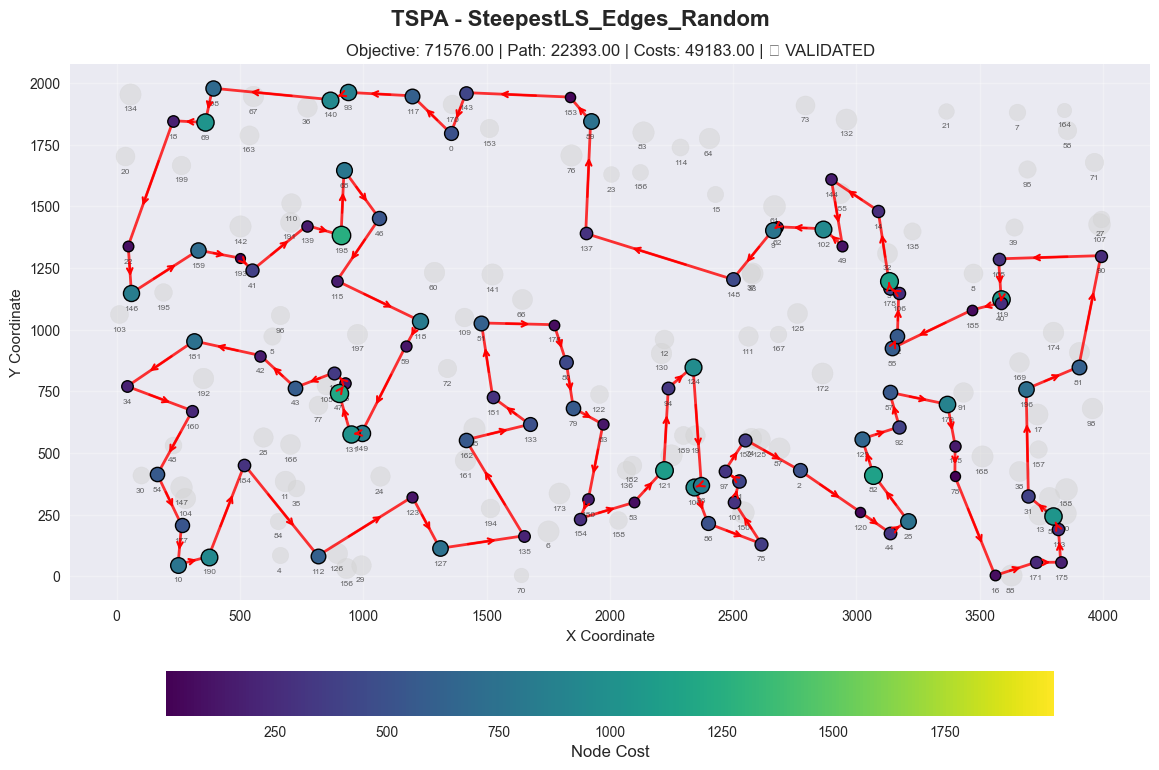


SteepestLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71576.00
Path Length: 22393.00
Node Costs: 49183.00
Selected Nodes: 100

Node Order (Route):
10, 190, 184, 112, 123, 127, 135, 162, 133, 151, 51, 176, 80, 79, 63, 180, 154, 53, 121, 94, 124, 26, 100, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 82, 129, 92, 57, 179, 145, 78, 16, 171, 175, 113, 56, 31, 196, 81, 90, 165, 119, 40, 185, 55, 52, 106, 178, 3, 14, 144, 49, 102, 62, 9, 148, 137, 89, 183, 143, 0, 117, 93, 140, 108, 69, 18, 22, 146, 159, 193, 41, 139, 198, 68, 46, 115, 118, 59, 149, 131, 47, 65, 116, 43, 42, 181, 34, 160, 54, 177




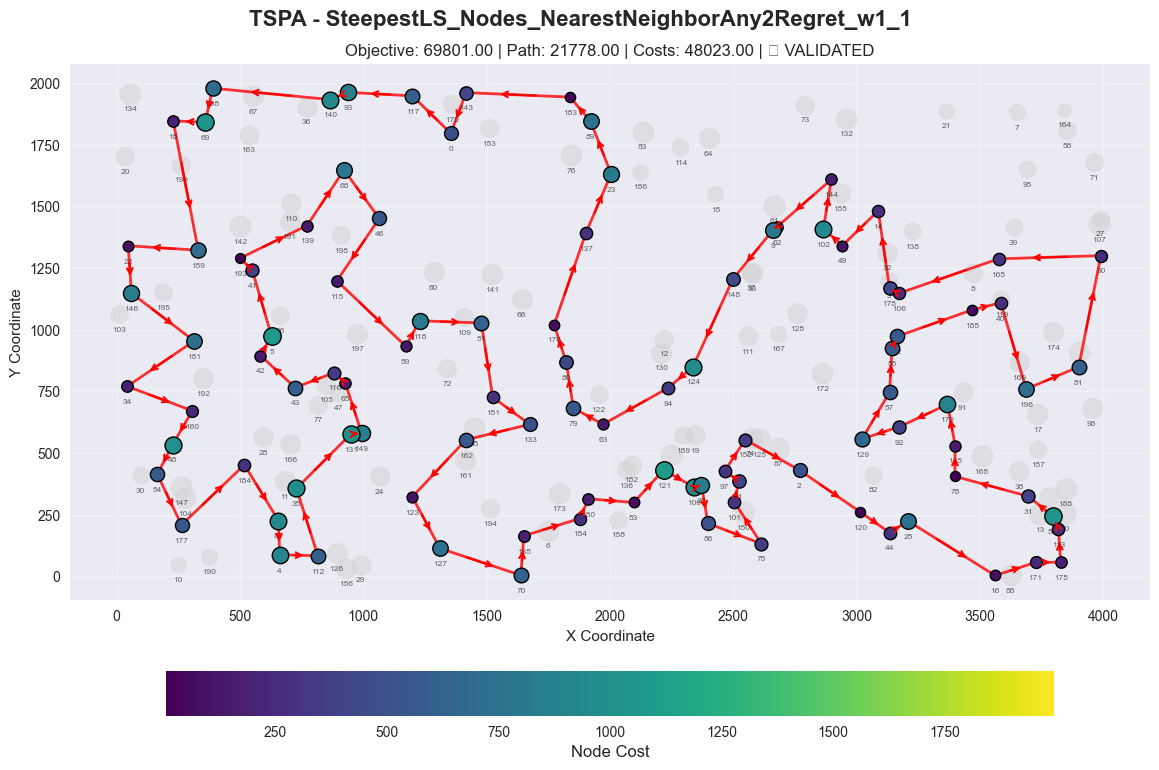


SteepestLS_Nodes_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 69801.00
Path Length: 21778.00
Node Costs: 48023.00
Selected Nodes: 100

Node Order (Route):
108, 69, 18, 159, 22, 146, 181, 34, 160, 48, 54, 177, 184, 84, 4, 112, 35, 131, 149, 65, 116, 43, 42, 5, 41, 193, 139, 68, 46, 115, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 154, 180, 53, 121, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 129, 57, 55, 52, 185, 40, 196, 81, 90, 165, 106, 178, 14, 49, 102, 144, 62, 9, 148, 124, 94, 63, 79, 80, 176, 137, 23, 89, 183, 143, 0, 117, 93, 140




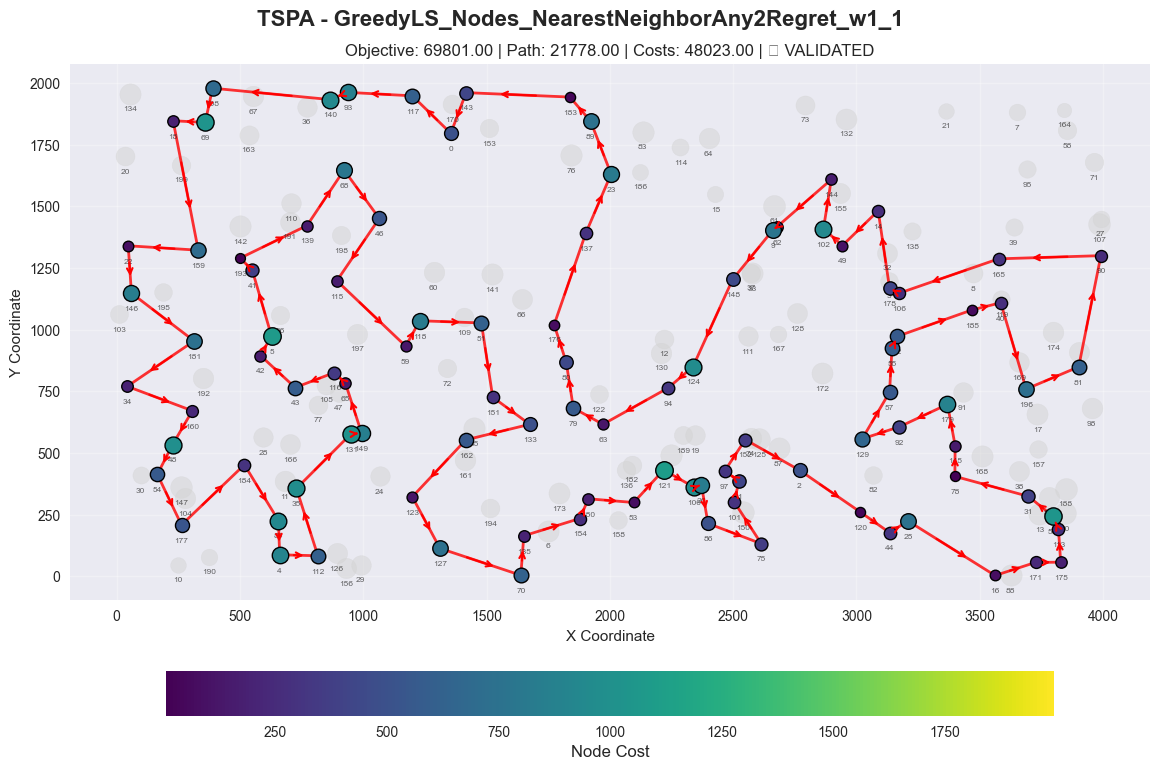


GreedyLS_Nodes_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 69801.00
Path Length: 21778.00
Node Costs: 48023.00
Selected Nodes: 100

Node Order (Route):
108, 69, 18, 159, 22, 146, 181, 34, 160, 48, 54, 177, 184, 84, 4, 112, 35, 131, 149, 65, 116, 43, 42, 5, 41, 193, 139, 68, 46, 115, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 154, 180, 53, 121, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 129, 57, 55, 52, 185, 40, 196, 81, 90, 165, 106, 178, 14, 49, 102, 144, 62, 9, 148, 124, 94, 63, 79, 80, 176, 137, 23, 89, 183, 143, 0, 117, 93, 140




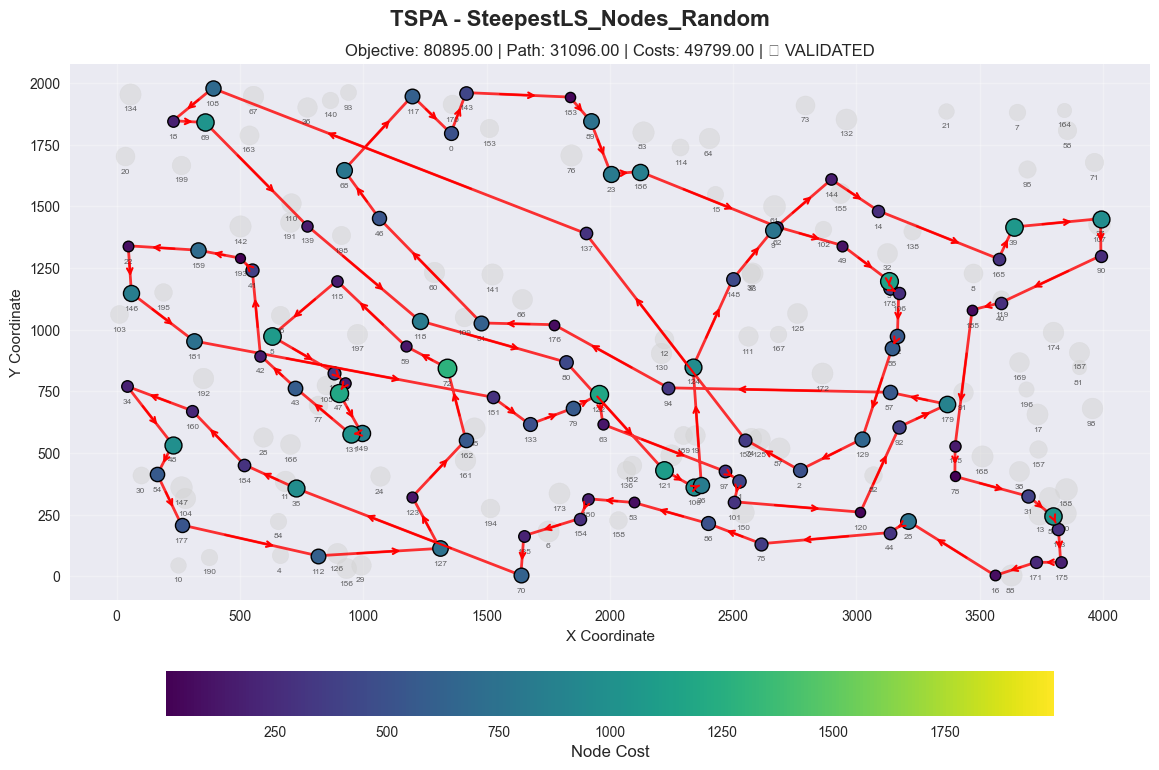


SteepestLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 80895.00
Path Length: 31096.00
Node Costs: 49799.00
Selected Nodes: 100

Node Order (Route):
16, 25, 44, 75, 86, 53, 180, 154, 135, 70, 35, 184, 160, 34, 48, 54, 177, 112, 127, 123, 162, 72, 59, 115, 5, 116, 65, 47, 149, 131, 43, 42, 41, 193, 159, 22, 146, 181, 151, 133, 79, 122, 63, 97, 1, 101, 120, 92, 179, 57, 94, 176, 51, 46, 68, 117, 0, 143, 183, 89, 23, 186, 62, 49, 3, 178, 106, 52, 55, 129, 2, 152, 137, 108, 18, 69, 139, 118, 80, 121, 100, 26, 124, 148, 9, 144, 14, 165, 39, 27, 90, 40, 185, 145, 78, 31, 56, 113, 175, 171




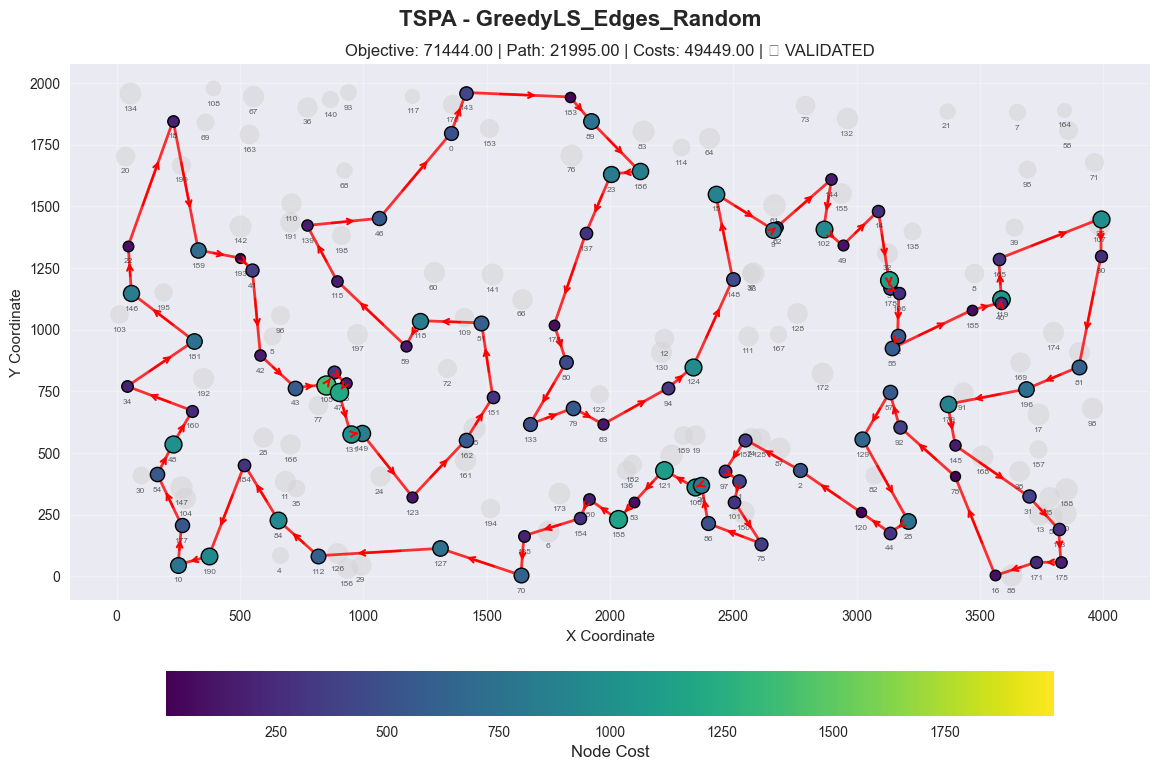


GreedyLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71444.00
Path Length: 21995.00
Node Costs: 49449.00
Selected Nodes: 100

Node Order (Route):
2, 152, 97, 1, 101, 75, 86, 26, 100, 121, 53, 158, 180, 154, 135, 70, 127, 112, 84, 184, 190, 10, 177, 54, 48, 160, 34, 181, 146, 22, 18, 159, 193, 41, 42, 43, 105, 116, 65, 47, 131, 149, 123, 162, 151, 51, 118, 59, 115, 139, 46, 0, 143, 183, 89, 186, 23, 137, 176, 80, 133, 79, 63, 94, 124, 148, 15, 9, 62, 144, 102, 49, 14, 3, 178, 106, 52, 55, 185, 40, 119, 165, 27, 90, 81, 196, 179, 145, 31, 113, 175, 171, 16, 78, 92, 57, 129, 25, 44, 120




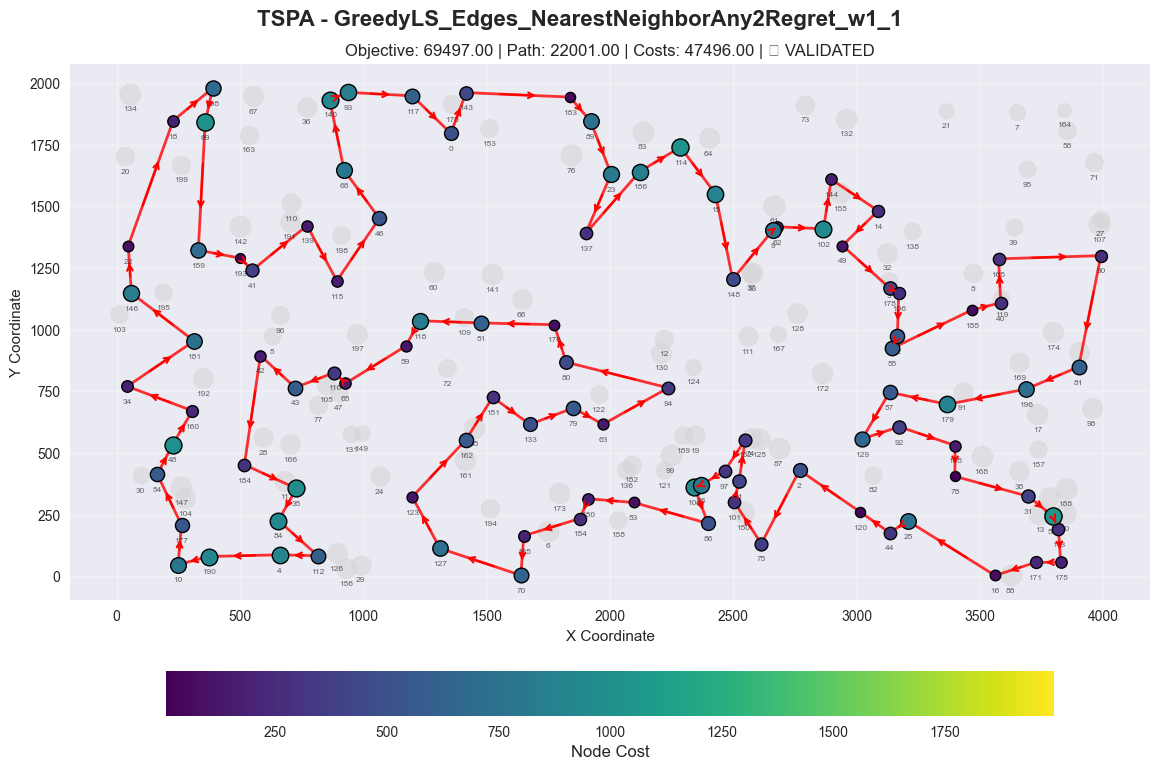


GreedyLS_Edges_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 69497.00
Path Length: 22001.00
Node Costs: 47496.00
Selected Nodes: 100

Node Order (Route):
31, 56, 113, 175, 171, 16, 25, 44, 120, 2, 75, 101, 1, 152, 97, 26, 100, 86, 53, 180, 154, 135, 70, 127, 123, 162, 151, 133, 79, 63, 94, 80, 176, 51, 118, 59, 65, 116, 43, 42, 184, 35, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181, 146, 22, 18, 108, 69, 159, 193, 41, 139, 115, 46, 68, 140, 93, 117, 0, 143, 183, 89, 23, 137, 186, 114, 15, 148, 9, 62, 102, 144, 14, 49, 178, 106, 52, 55, 185, 40, 165, 90, 81, 196, 179, 57, 129, 92, 145, 78




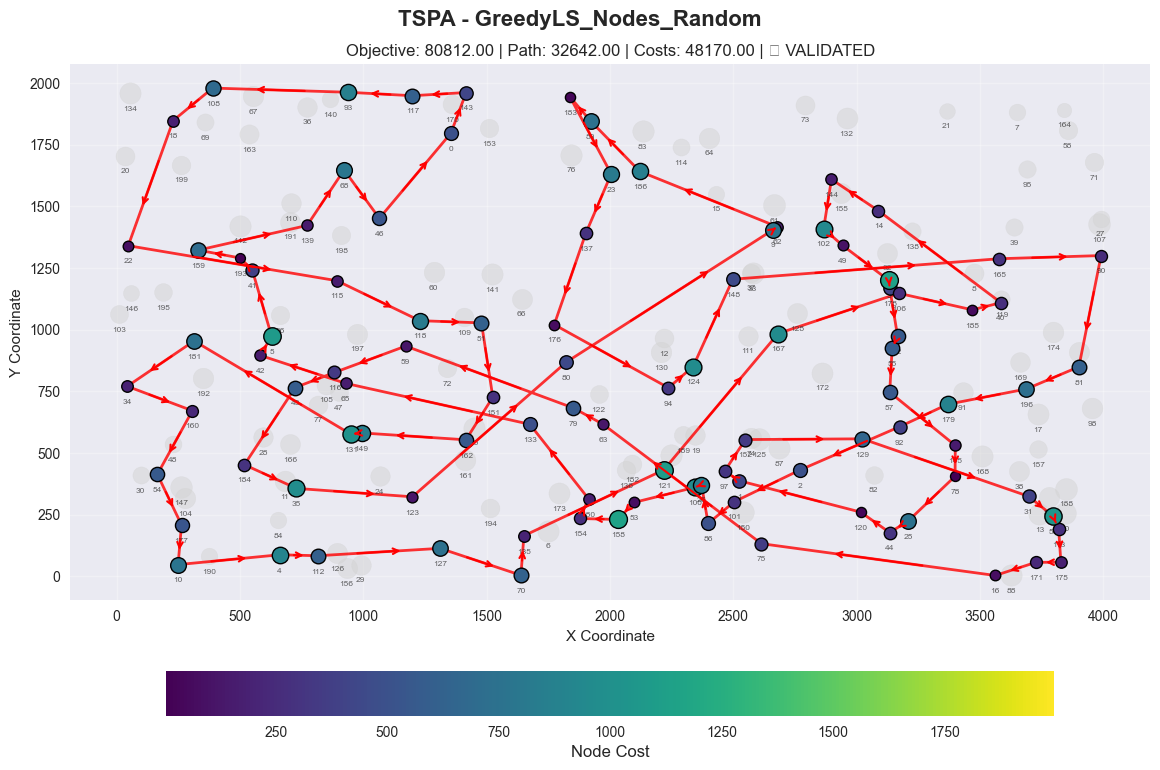


GreedyLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 80812.00
Path Length: 32642.00
Node Costs: 48170.00
Selected Nodes: 100

Node Order (Route):
43, 184, 35, 123, 80, 9, 62, 186, 89, 183, 23, 137, 176, 94, 124, 148, 165, 90, 81, 196, 179, 92, 2, 101, 86, 26, 100, 53, 158, 154, 180, 133, 65, 42, 5, 41, 193, 159, 139, 68, 46, 0, 143, 117, 93, 108, 18, 22, 115, 118, 51, 151, 162, 149, 131, 181, 34, 160, 54, 177, 10, 4, 112, 127, 70, 135, 121, 167, 106, 185, 40, 14, 144, 102, 49, 3, 178, 52, 55, 57, 145, 78, 25, 44, 120, 1, 97, 152, 129, 31, 56, 113, 175, 171, 16, 75, 63, 79, 59, 116




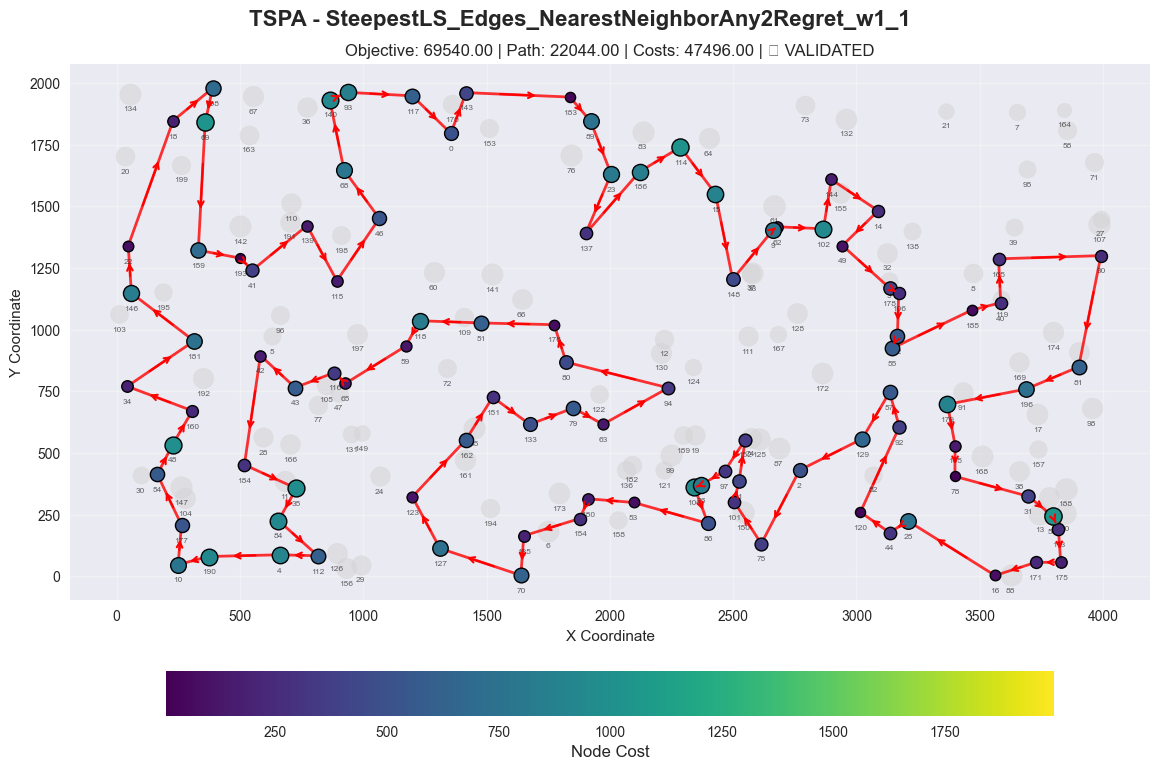


SteepestLS_Edges_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 69540.00
Path Length: 22044.00
Node Costs: 47496.00
Selected Nodes: 100

Node Order (Route):
31, 56, 113, 175, 171, 16, 25, 44, 120, 92, 57, 129, 2, 75, 101, 1, 152, 97, 26, 100, 86, 53, 180, 154, 135, 70, 127, 123, 162, 151, 133, 79, 63, 94, 80, 176, 51, 118, 59, 65, 116, 43, 42, 184, 35, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181, 146, 22, 18, 108, 69, 159, 193, 41, 139, 115, 46, 68, 140, 93, 117, 0, 143, 183, 89, 23, 137, 186, 114, 15, 148, 9, 62, 102, 144, 14, 49, 178, 106, 52, 55, 185, 40, 165, 90, 81, 196, 179, 145, 78



TSPB - BEST SOLUTIONS



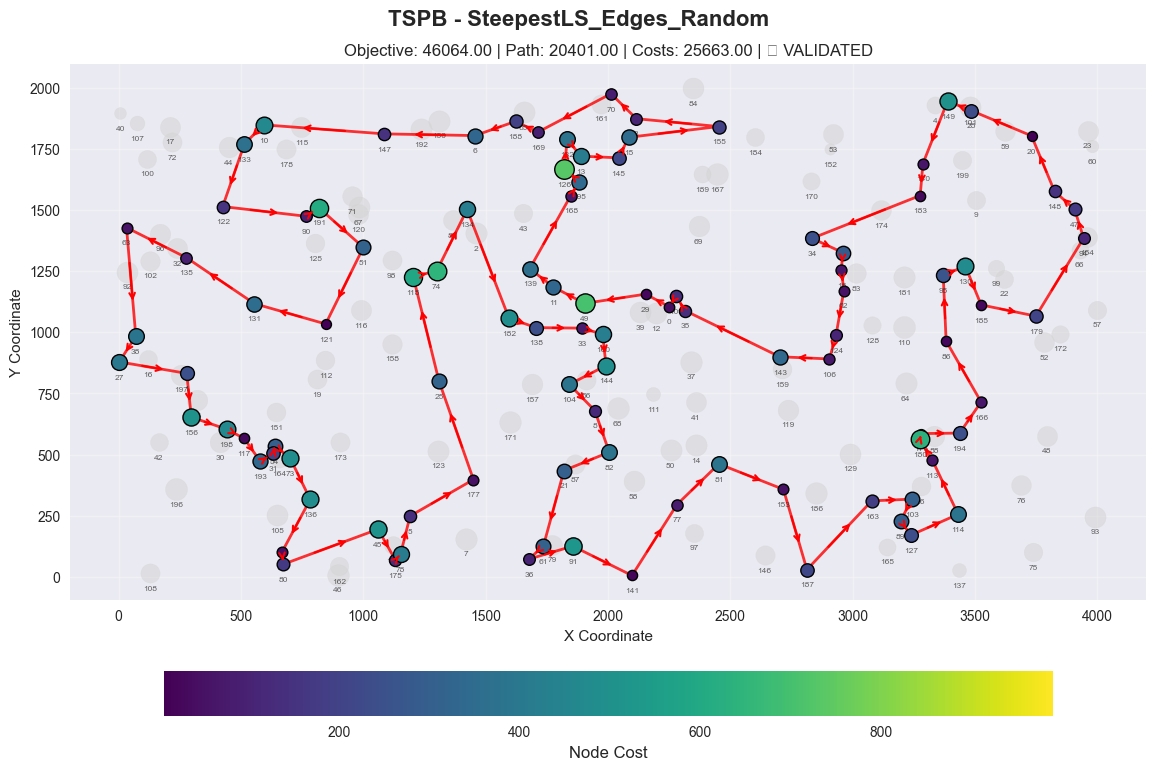


SteepestLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 46064.00
Path Length: 20401.00
Node Costs: 25663.00
Selected Nodes: 100

Node Order (Route):
20, 28, 149, 140, 183, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 49, 11, 139, 168, 195, 126, 132, 13, 145, 15, 155, 3, 70, 169, 188, 6, 147, 10, 133, 122, 90, 191, 51, 121, 131, 135, 63, 38, 27, 1, 156, 198, 117, 193, 31, 54, 73, 136, 190, 80, 45, 175, 78, 5, 177, 25, 118, 74, 134, 182, 138, 33, 160, 144, 104, 8, 82, 21, 61, 36, 91, 141, 77, 81, 153, 187, 163, 103, 89, 127, 114, 113, 180, 176, 194, 166, 86, 95, 130, 185, 179, 94, 47, 148




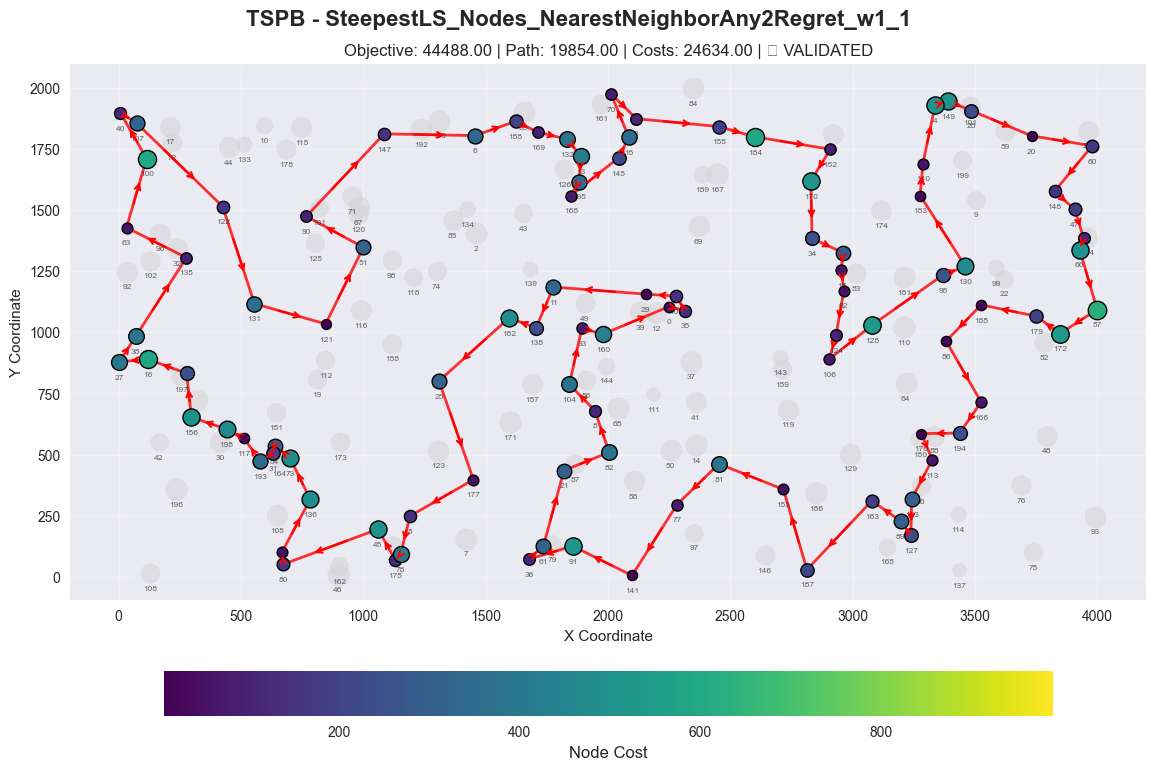


SteepestLS_Nodes_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44488.00
Path Length: 19854.00
Node Costs: 24634.00
Selected Nodes: 100

Node Order (Route):
131, 121, 51, 90, 147, 6, 188, 169, 132, 13, 195, 168, 145, 15, 70, 3, 155, 184, 152, 170, 34, 55, 18, 62, 124, 106, 128, 95, 130, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 57, 172, 179, 185, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187, 153, 81, 77, 141, 91, 36, 61, 21, 82, 8, 104, 33, 160, 0, 35, 109, 29, 11, 138, 182, 25, 177, 5, 78, 175, 45, 80, 190, 136, 73, 54, 31, 193, 117, 198, 156, 1, 16, 27, 38, 135, 63, 100, 40, 107, 122




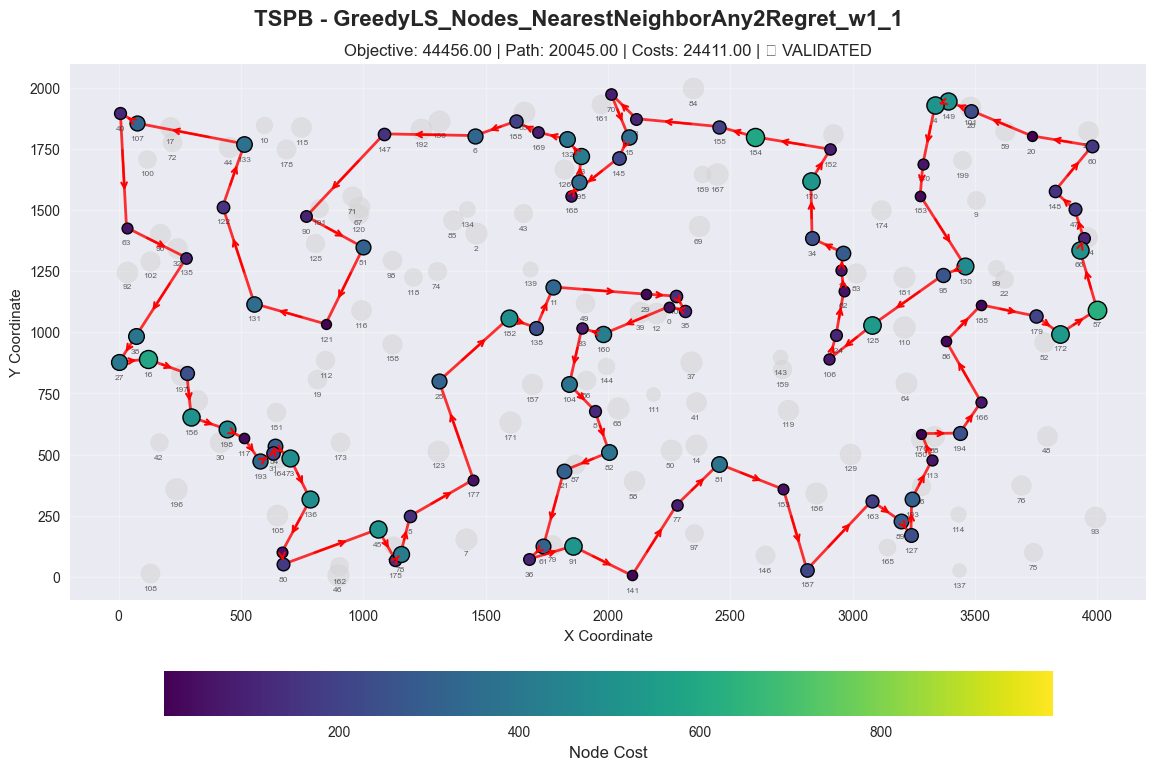


GreedyLS_Nodes_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44456.00
Path Length: 20045.00
Node Costs: 24411.00
Selected Nodes: 100

Node Order (Route):
122, 133, 107, 40, 63, 135, 38, 27, 16, 1, 156, 198, 117, 193, 31, 54, 73, 136, 190, 80, 45, 175, 78, 5, 177, 25, 182, 138, 11, 29, 109, 35, 0, 160, 33, 104, 8, 82, 21, 61, 36, 91, 141, 77, 81, 153, 187, 163, 89, 127, 103, 113, 176, 194, 166, 86, 185, 179, 172, 57, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 130, 95, 128, 106, 124, 62, 18, 55, 34, 170, 152, 184, 155, 3, 70, 15, 145, 168, 195, 13, 132, 169, 188, 6, 147, 90, 51, 121, 131




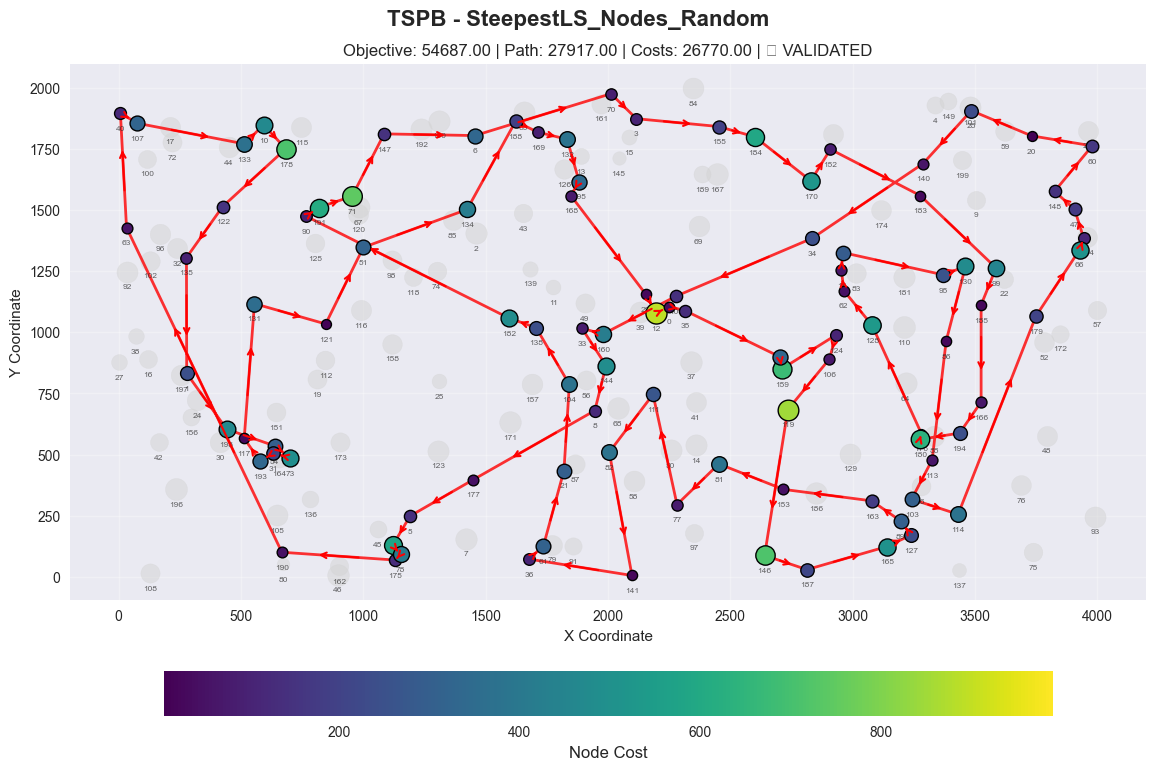


SteepestLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 54687.00
Path Length: 27917.00
Node Costs: 26770.00
Selected Nodes: 100

Node Order (Route):
176, 128, 62, 18, 55, 95, 130, 86, 113, 103, 114, 179, 66, 94, 47, 148, 60, 20, 28, 140, 34, 109, 160, 33, 144, 8, 177, 5, 142, 78, 175, 190, 63, 40, 107, 133, 10, 178, 122, 135, 1, 198, 54, 73, 31, 193, 117, 131, 121, 51, 134, 188, 169, 132, 195, 168, 29, 12, 0, 35, 143, 159, 124, 106, 119, 146, 187, 165, 127, 89, 163, 153, 81, 77, 111, 82, 141, 36, 61, 21, 104, 138, 182, 90, 191, 71, 147, 6, 70, 3, 155, 184, 170, 152, 183, 99, 185, 166, 194, 180




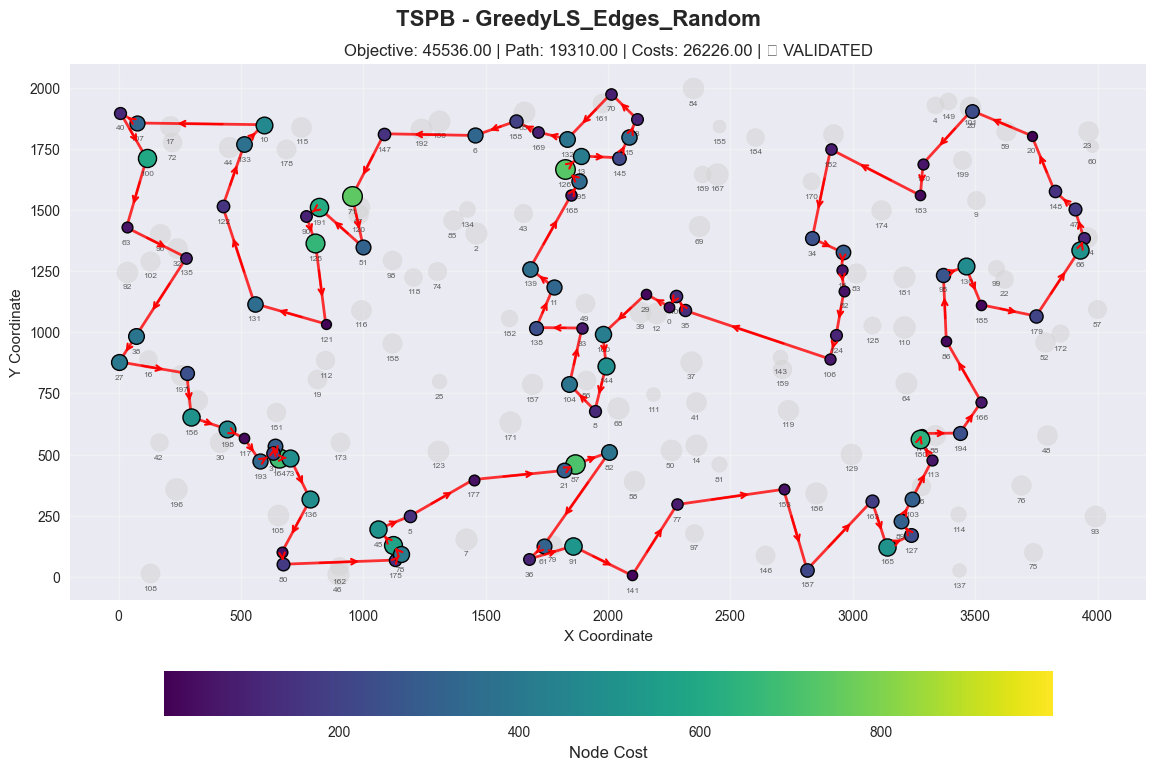


GreedyLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 45536.00
Path Length: 19310.00
Node Costs: 26226.00
Selected Nodes: 100

Node Order (Route):
33, 138, 11, 139, 168, 195, 126, 13, 145, 15, 3, 70, 132, 169, 188, 6, 147, 71, 51, 191, 90, 125, 121, 131, 122, 133, 10, 107, 40, 100, 63, 135, 38, 27, 1, 156, 198, 117, 193, 31, 54, 164, 73, 136, 190, 80, 175, 78, 142, 45, 5, 177, 21, 87, 82, 61, 36, 91, 141, 77, 153, 187, 163, 165, 127, 89, 103, 113, 180, 176, 194, 166, 86, 95, 130, 185, 179, 66, 94, 47, 148, 20, 28, 140, 183, 152, 34, 55, 18, 62, 124, 106, 35, 109, 0, 29, 160, 144, 8, 104




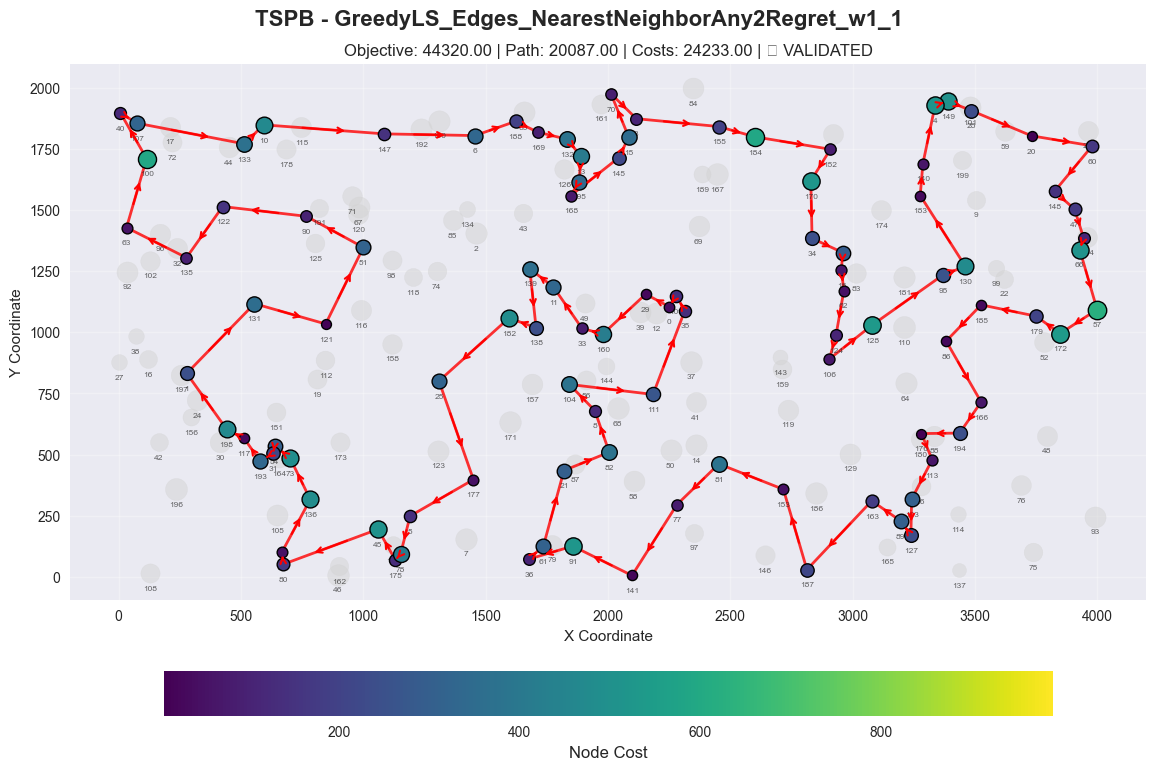


GreedyLS_Edges_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44320.00
Path Length: 20087.00
Node Costs: 24233.00
Selected Nodes: 100

Node Order (Route):
40, 107, 133, 10, 147, 6, 188, 169, 132, 13, 195, 168, 145, 15, 70, 3, 155, 184, 152, 170, 34, 55, 18, 62, 124, 106, 128, 95, 130, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 57, 172, 179, 185, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187, 153, 81, 77, 141, 91, 36, 61, 21, 82, 8, 104, 111, 35, 109, 0, 29, 160, 33, 11, 139, 138, 182, 25, 177, 5, 78, 175, 45, 80, 190, 136, 73, 54, 31, 193, 117, 198, 1, 131, 121, 51, 90, 122, 135, 63, 100




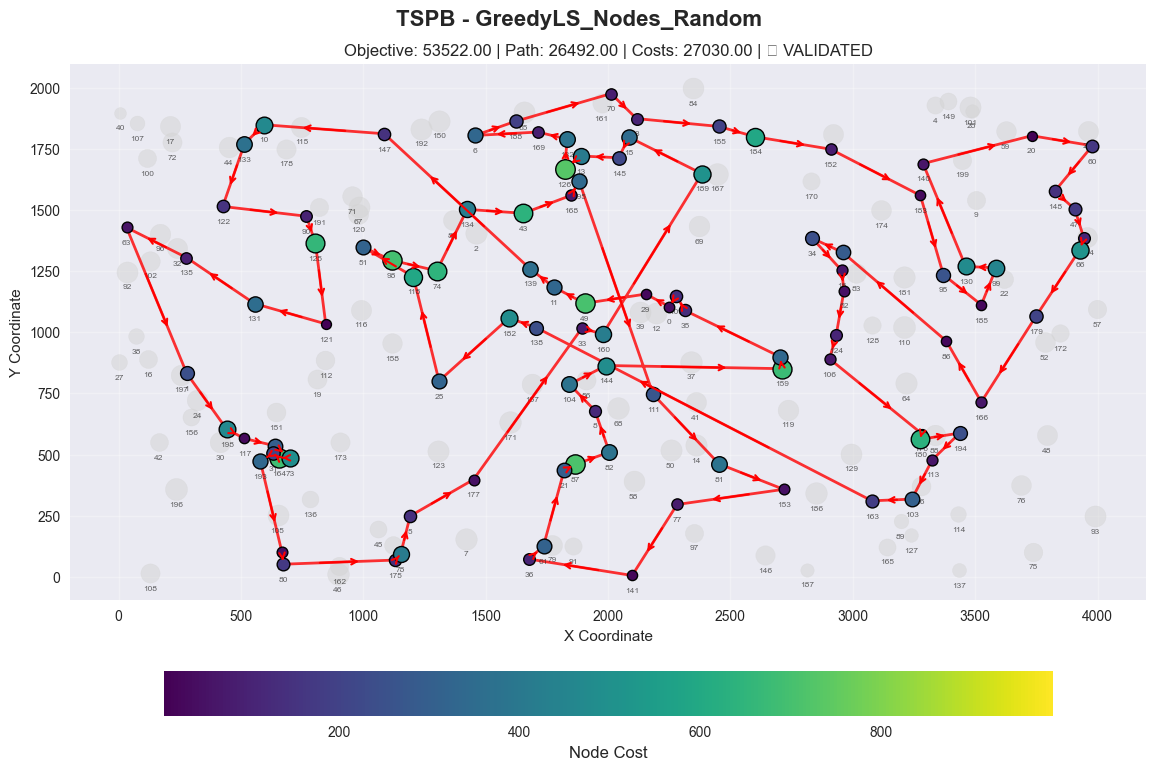


GreedyLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 53522.00
Path Length: 26492.00
Node Costs: 27030.00
Selected Nodes: 100

Node Order (Route):
63, 1, 198, 117, 54, 73, 164, 31, 193, 190, 80, 175, 78, 5, 177, 33, 160, 189, 15, 145, 13, 126, 132, 169, 6, 188, 70, 3, 155, 184, 152, 183, 95, 185, 99, 130, 140, 20, 60, 148, 47, 94, 66, 179, 166, 86, 55, 34, 18, 62, 124, 106, 176, 180, 194, 113, 103, 163, 138, 182, 25, 118, 51, 98, 74, 134, 43, 168, 195, 111, 81, 153, 77, 141, 36, 61, 21, 87, 82, 8, 104, 144, 159, 143, 35, 109, 0, 29, 49, 11, 139, 147, 10, 133, 122, 90, 125, 121, 131, 135




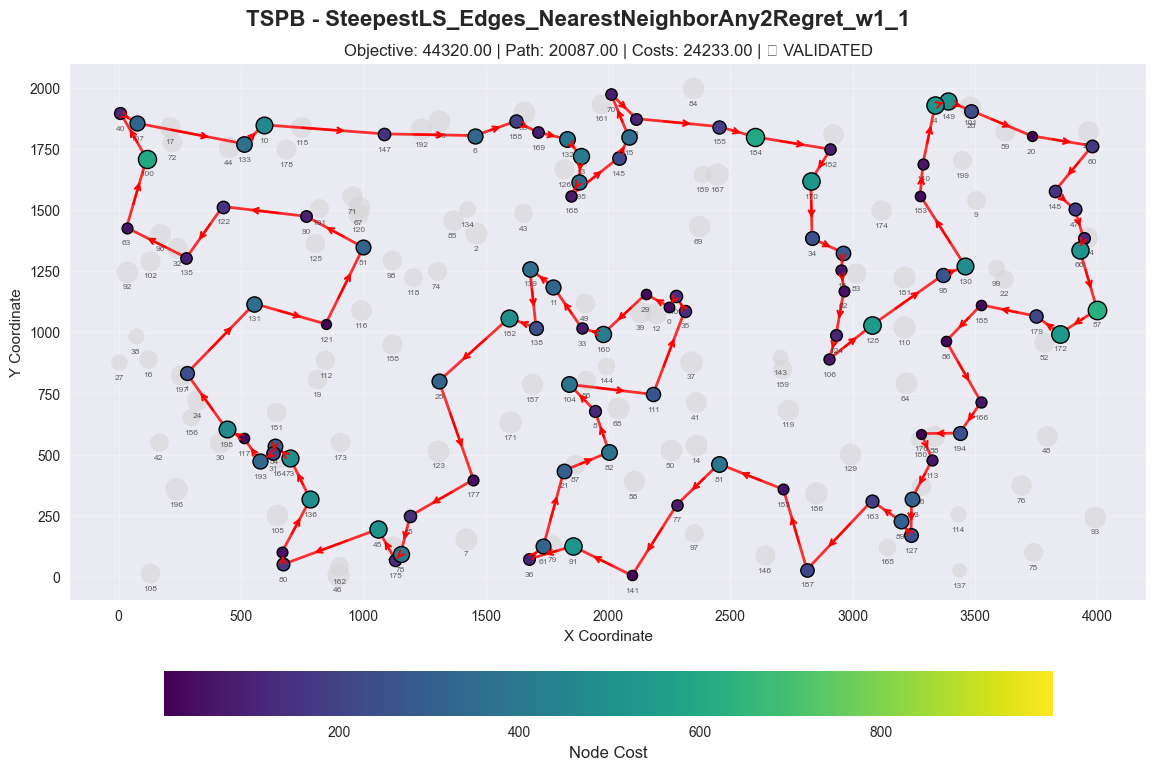


SteepestLS_Edges_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44320.00
Path Length: 20087.00
Node Costs: 24233.00
Selected Nodes: 100

Node Order (Route):
135, 63, 100, 40, 107, 133, 10, 147, 6, 188, 169, 132, 13, 195, 168, 145, 15, 70, 3, 155, 184, 152, 170, 34, 55, 18, 62, 124, 106, 128, 95, 130, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 57, 172, 179, 185, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187, 153, 81, 77, 141, 91, 36, 61, 21, 82, 8, 104, 111, 35, 109, 0, 29, 160, 33, 11, 139, 138, 182, 25, 177, 5, 78, 175, 45, 80, 190, 136, 73, 54, 31, 193, 117, 198, 1, 131, 121, 51, 90, 122




In [70]:
# Plot best solutions using utility function
plot_best_solutions(algorithm_data)

## Algorithm Performance Comparison

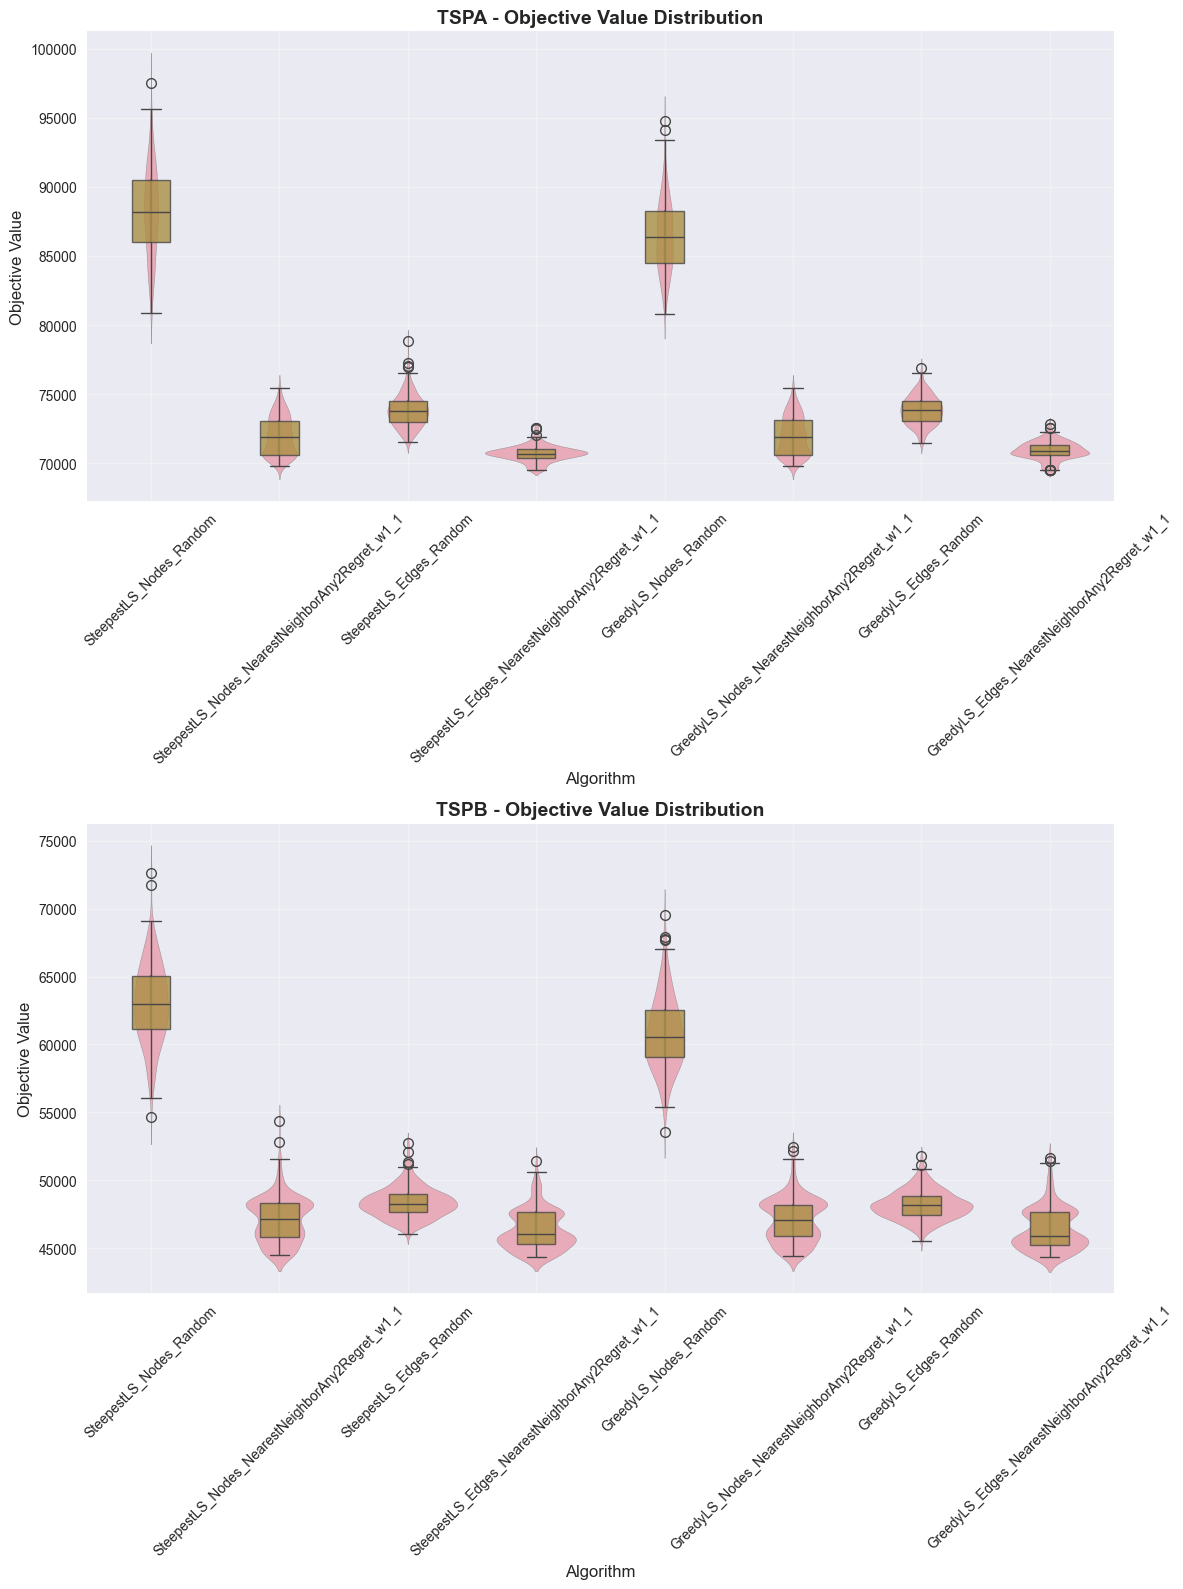

In [71]:
# Performance comparison plots using utility functions
plot_objective_distributions(algorithm_data)